# New Audio Models

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from tools.create import create_single_models, create_set_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from tools.viz import (plot_regressor,
                       plot_metrics, plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline

In [4]:
api = Neuroscout()

## Define predictors and confounds

In [5]:
rmslist = ['rms']
spectral = ['spectral_centroid']
cqt = ['chroma_cqt_' + str(i) for i in range(12)]
tonal = ['tonal_centroid_0', 'tonal_centroid_1', 'tonal_centroid_2', 'tonal_centroid_3', 'tonal_centroid_4', 'tonal_centroid_5']

In [6]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

## Create models

In [37]:
#single_models = create_single_models(rmslist, confounds)
#tonal_models = create_set_models(tonal, confounds, name='tonnetz')
#tonal_rms_models = create_set_models(tonal+rmslist, confounds, name='+'.join(tonal+rmslist))
#cqt_rms_models = create_set_models(cqt+rmslist, confounds, name='+'.join(cqt+rmslist))
spec_models = create_set_models(spectral+rmslist, confounds, name='+'.join(spectral+rmslist))

In [9]:
fname = Path('models') / 'new_rms.json'
fname_tonal = Path('models') / 'tonal.json'
fname_tonal_rms = Path('models') / 'tonal_rms.json'
fname_cqt_rms = Path('models') / 'cqt_rms.json'
fname_spec_rms = Path('models') / 'spectral_rms.json'

In [40]:
#dump_collection(single_models, fname)
#dump_collection(tonal_rms_models, fname_tonal_rms)
#dump_collection(tonal_models, fname_tonal)
#dump_collection(cqt_rms_models, fname_cqt_rms)
dump_collection(spec_models, fname_spec_rms)

In [10]:
single_models = load_collection(fname)
tonal_models = load_collection(fname_tonal)
tonal_rms_models = load_collection(fname_tonal_rms)
cqt_rms_models = load_collection(fname_cqt_rms)
spec_models = load_collection(fname_spec_rms)

In [11]:
tonal_models = {'+'.join(tonal): tonal_models}
tonal_rms_models = {'+'.join(tonal+rmslist): tonal_rms_models}
cqt_rms_models = {'+'.join(cqt+rmslist): cqt_rms_models}
spec_models = {'+'.join(spectral+rmslist): spec_models}

In [ ]:
cdict = {"Name": "any_tonnetz",
         "ConditionList": tonal,
         "Weights": np.eye(len(tonal)).astype(int).tolist(),
         "Type": "F"}
for (pred, ds, task), analysis in flatten_collection(tonal_rms_models):
    analysis.model['Steps'][2]['Contrasts'] = [cdict]
    analysis.push()

In [28]:
cdict_cqt = {"Name": "any_cqt",
         "ConditionList": cqt,
         "Weights": np.eye(len(cqt)).astype(int).tolist(),
         "Type": "F"}
for (pred, ds, task), analysis in flatten_collection(cqt_rms_models):
    analysis.model['Steps'][2]['Contrasts'] = [cdict_cqt]
    analysis.push()

## Generate reports

In [ ]:
for (pred, dataset, task), model in flatten_collection(single_models)[:2]:
    model.generate_report(run_id=model.runs[0])

In [ ]:
for (pred, dataset, task), model in flatten_collection(tonal_models)[:2]:
    model.generate_report(run_id=model.runs[0])

In [ ]:
for (pred, dataset, task), model in flatten_collection(tonal_rms_models)[:2]:
    model.generate_report(run_id=model.runs[0])

In [29]:
for (pred, dataset, task), model in flatten_collection(cqt_rms_models)[:2]:
    model.generate_report(run_id=model.runs[0])

In [43]:
for (pred, dataset, task), model in flatten_collection(spec_models)[:2]:
    model.generate_report(run_id=model.runs[0])

## Compile reports

In [ ]:
for (pred, dataset, task), model in flatten_collection(single_models):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'{pred} {model.status} for {dataset}')

In [ ]:
for (pred, dataset, task), model in flatten_collection(tonal_models):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'{pred} {model.status} for {dataset}')

In [ ]:
for (pred, dataset, task), model in flatten_collection(tonal_rms_models):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'{pred} {model.status} for {dataset}')

In [25]:
for (pred, dataset, task), model in flatten_collection(cqt_rms_models):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'{pred} {model.status} for {dataset}')

chroma_cqt_0+chroma_cqt_1+chroma_cqt_2+chroma_cqt_3+chroma_cqt_4+chroma_cqt_5+chroma_cqt_6+chroma_cqt_7+chroma_cqt_8+chroma_cqt_9+chroma_cqt_10+chroma_cqt_11+rms PASSED for Budapest
chroma_cqt_0+chroma_cqt_1+chroma_cqt_2+chroma_cqt_3+chroma_cqt_4+chroma_cqt_5+chroma_cqt_6+chroma_cqt_7+chroma_cqt_8+chroma_cqt_9+chroma_cqt_10+chroma_cqt_11+rms PASSED for HealthyBrainNetwork
chroma_cqt_0+chroma_cqt_1+chroma_cqt_2+chroma_cqt_3+chroma_cqt_4+chroma_cqt_5+chroma_cqt_6+chroma_cqt_7+chroma_cqt_8+chroma_cqt_9+chroma_cqt_10+chroma_cqt_11+rms PASSED for LearningTemporalStructure
chroma_cqt_0+chroma_cqt_1+chroma_cqt_2+chroma_cqt_3+chroma_cqt_4+chroma_cqt_5+chroma_cqt_6+chroma_cqt_7+chroma_cqt_8+chroma_cqt_9+chroma_cqt_10+chroma_cqt_11+rms PASSED for Life
chroma_cqt_0+chroma_cqt_1+chroma_cqt_2+chroma_cqt_3+chroma_cqt_4+chroma_cqt_5+chroma_cqt_6+chroma_cqt_7+chroma_cqt_8+chroma_cqt_9+chroma_cqt_10+chroma_cqt_11+rms PASSED for ParanoiaStory
chroma_cqt_0+chroma_cqt_1+chroma_cqt_2+chroma_cqt_3+chroma_cq

In [26]:
for (pred, dataset, task), model in flatten_collection(spec_models):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'{pred} {model.status} for {dataset}')

spectral_centroid+rms PASSED for Budapest
spectral_centroid+rms PASSED for HealthyBrainNetwork
spectral_centroid+rms PASSED for LearningTemporalStructure
spectral_centroid+rms PASSED for Life
spectral_centroid+rms PASSED for ParanoiaStory
spectral_centroid+rms PASSED for Raiders
spectral_centroid+rms PASSED for SchematicNarrative
spectral_centroid+rms PASSED for Sherlock
spectral_centroid+rms PASSED for SherlockMerlin
spectral_centroid+rms PASSED for SherlockMerlin
spectral_centroid+rms PASSED for studyforrest


In [34]:
' '.join([model.hash_id for (pred, dataset, task), model in flatten_collection(cqt_rms_models)])

'cg4rj i7r8m 6u4pc iawf9 jkk5a q2ytn bcmwt 8syob 7jxpc 9hqw6 ah96f'

In [14]:
' '.join([model.hash_id for (pred, dataset, task), model in flatten_collection(spec_models)])

'jombc jeyra 833t6 94qr3 47qom 8jmbk m8nvi uphbe 7s6n9 oc3x8 ip6wb'

## Plot results

In [16]:
flat_models = flatten_collection(single_models)
flat_models_tonal = flatten_collection(tonal_models)
flat_models_tonal_rms = flatten_collection(tonal_rms_models)
flat_models_cqt_rms = flatten_collection(cqt_rms_models)
flat_models_spec = flatten_collection(spec_models)

No image for HealthyBrainNetwork


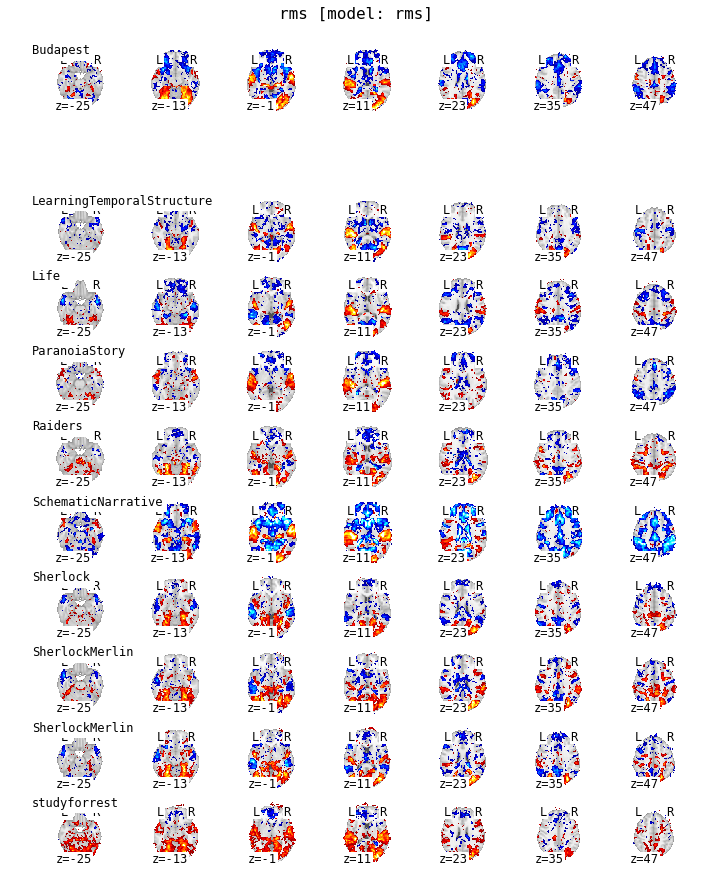

In [12]:
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_analysis(flat_models,
                          vmax=10, display_mode='z', figsize=(12,15),
                          threshold=1.96, colorbar=False)

No image for HealthyBrainNetwork


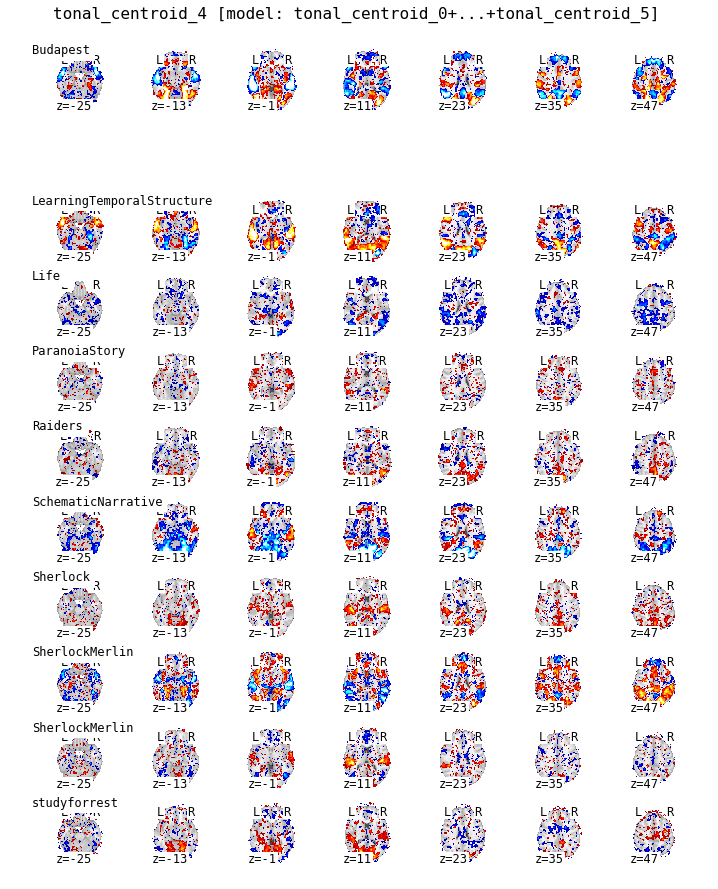

No image for HealthyBrainNetwork


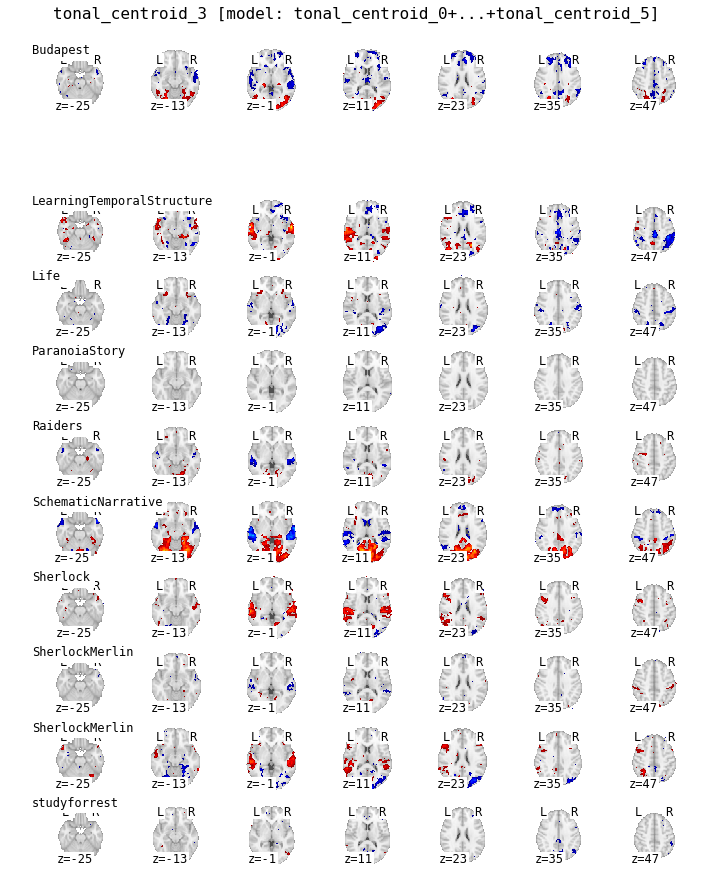

No image for HealthyBrainNetwork


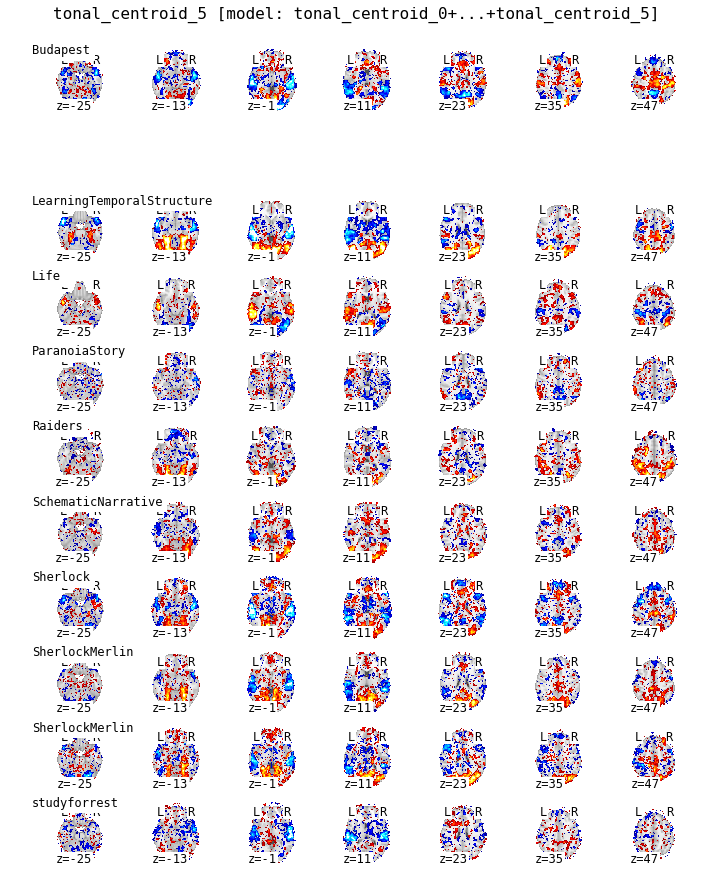

No image for HealthyBrainNetwork


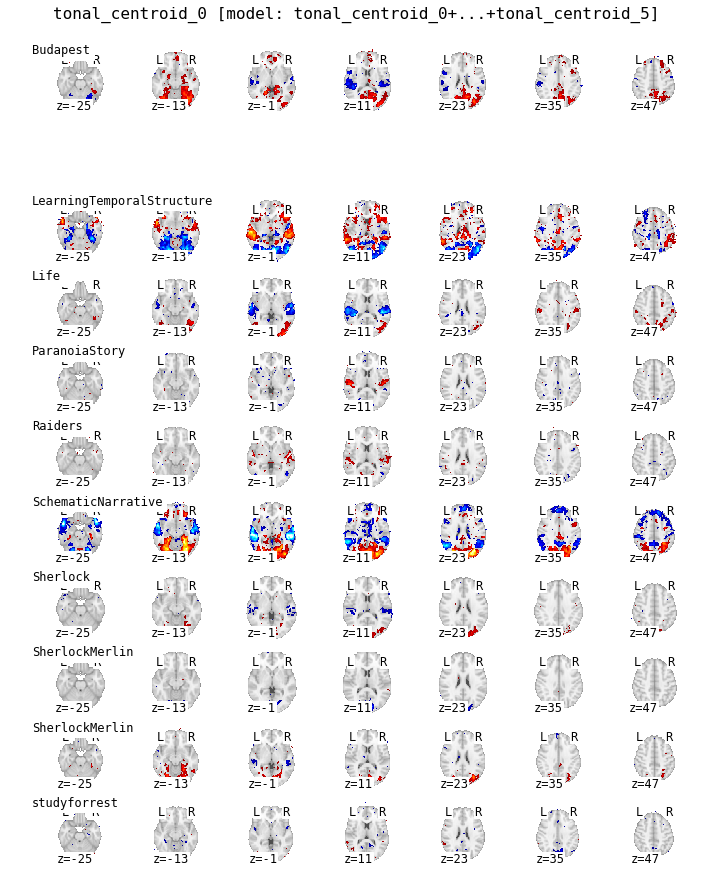

No image for HealthyBrainNetwork


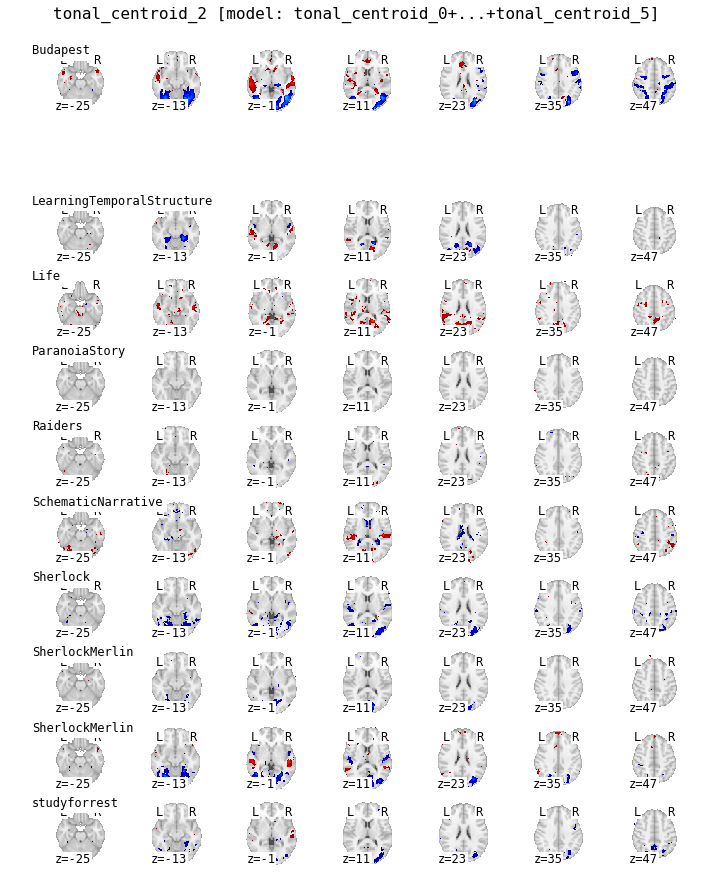

No image for HealthyBrainNetwork


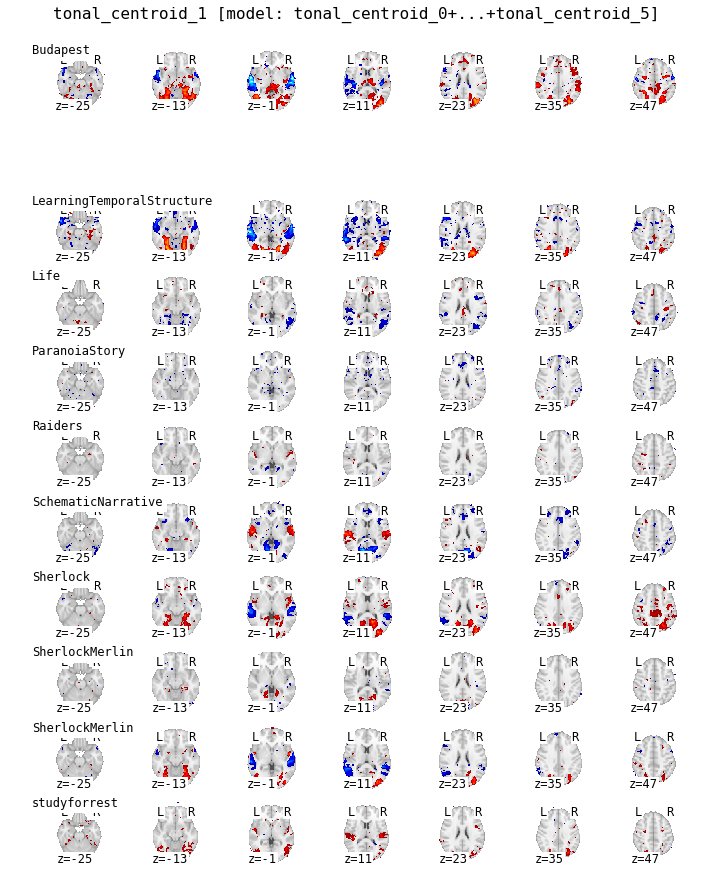

In [13]:
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_analysis(flat_models_tonal,
                          vmax=10, display_mode='z', figsize=(12,15),
                          threshold=1.96, colorbar=False)

No image for HealthyBrainNetwork


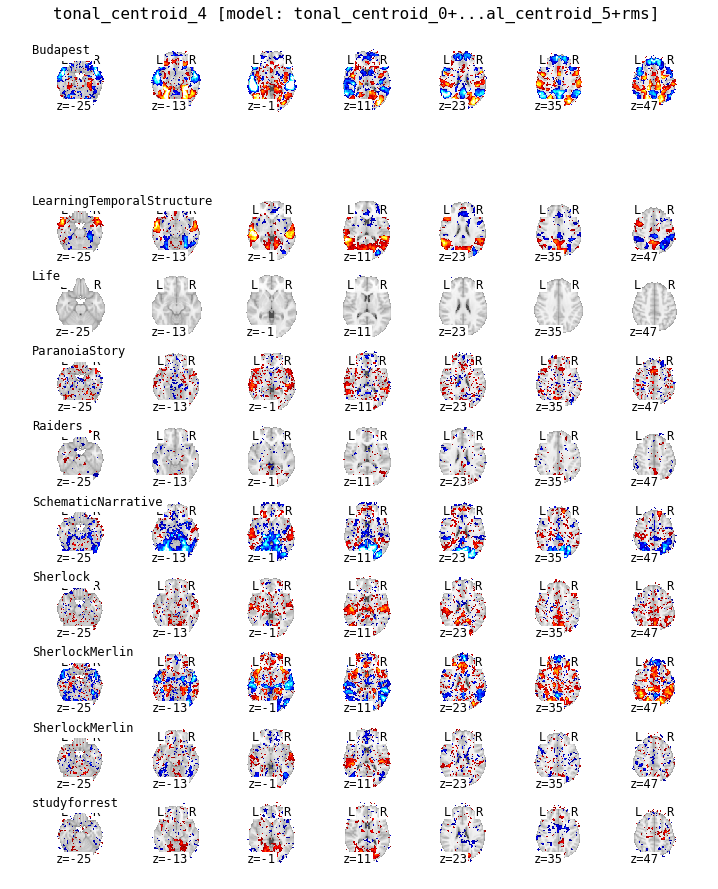

No image for HealthyBrainNetwork


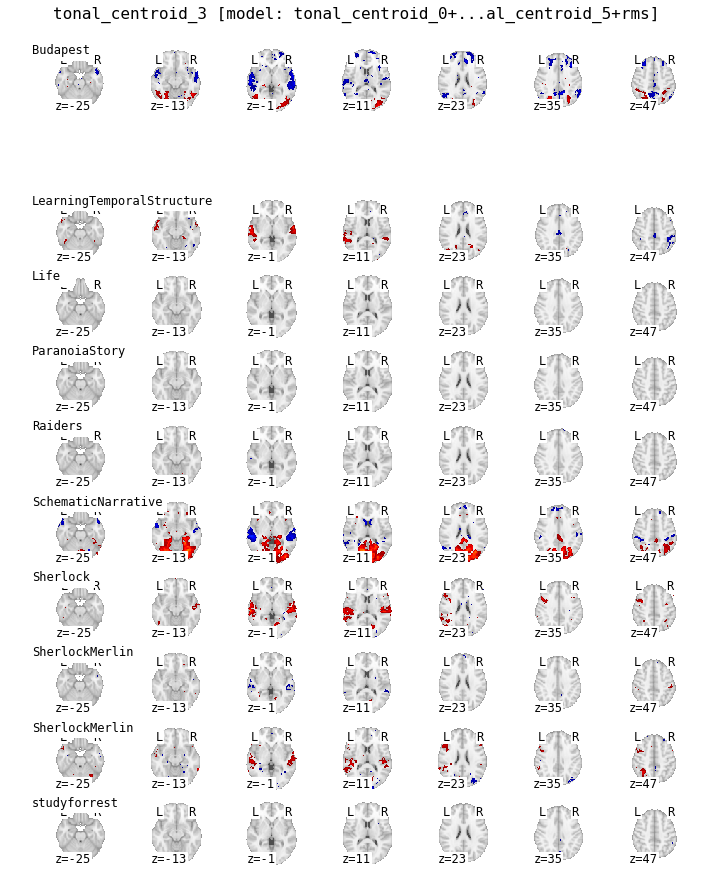

No image for HealthyBrainNetwork


/home/roberta/anaconda3/lib/python3.7/site-packages/nilearn/plotting/displays.py:780: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


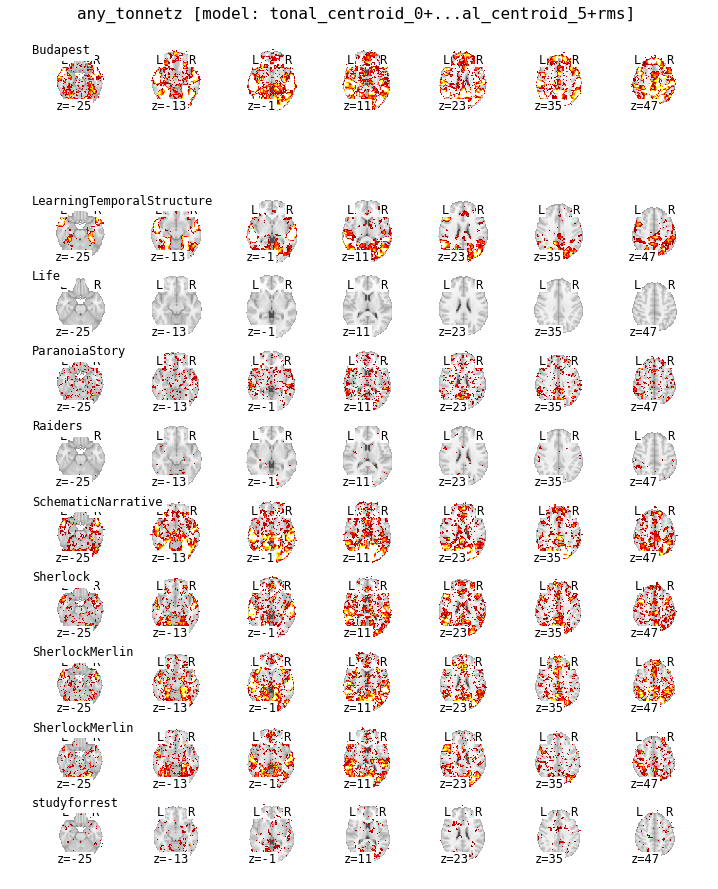

No image for HealthyBrainNetwork


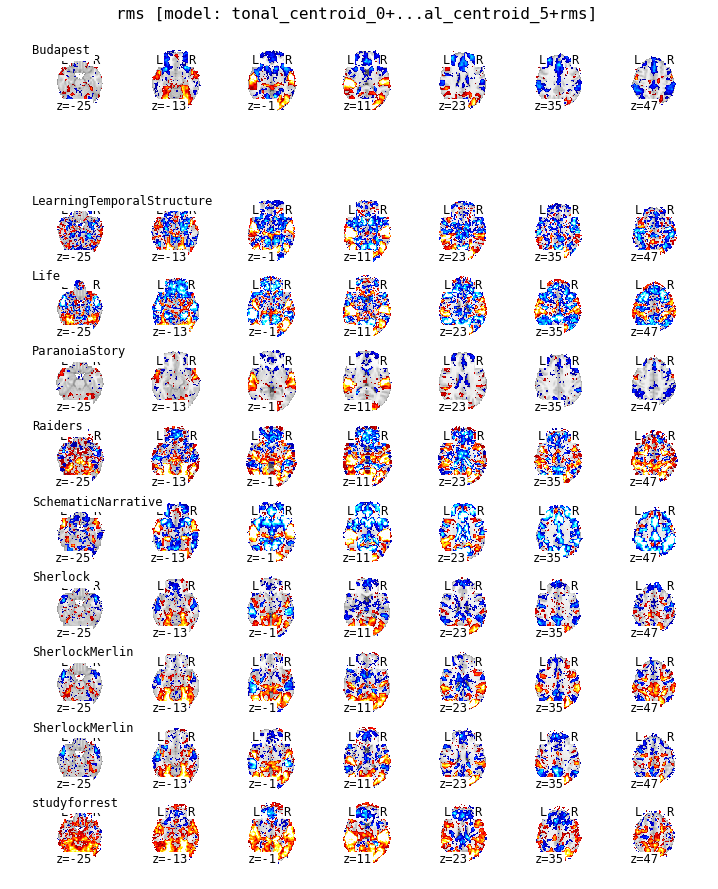

No image for HealthyBrainNetwork


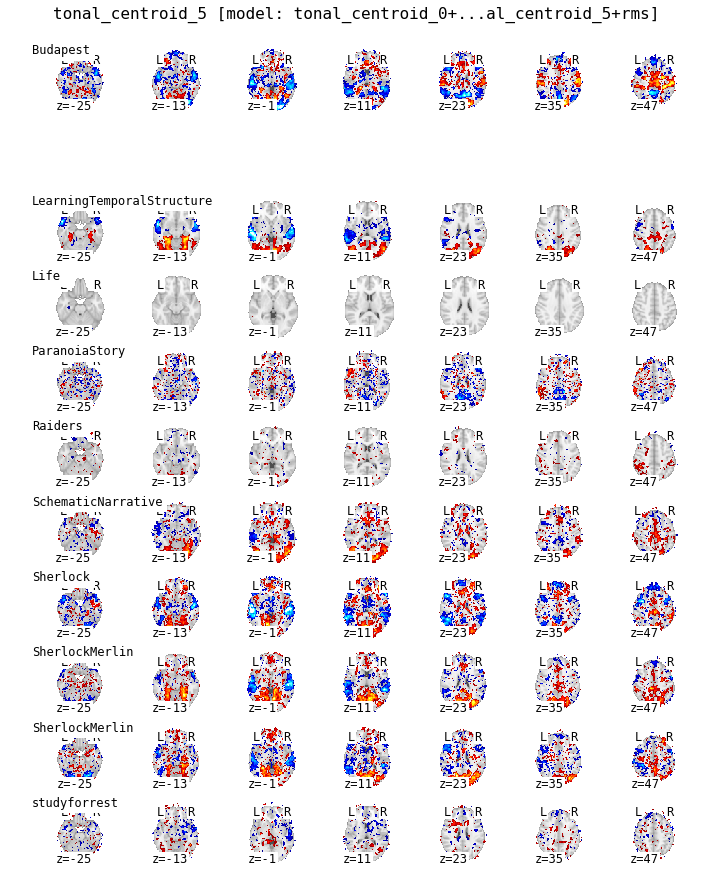

No image for HealthyBrainNetwork


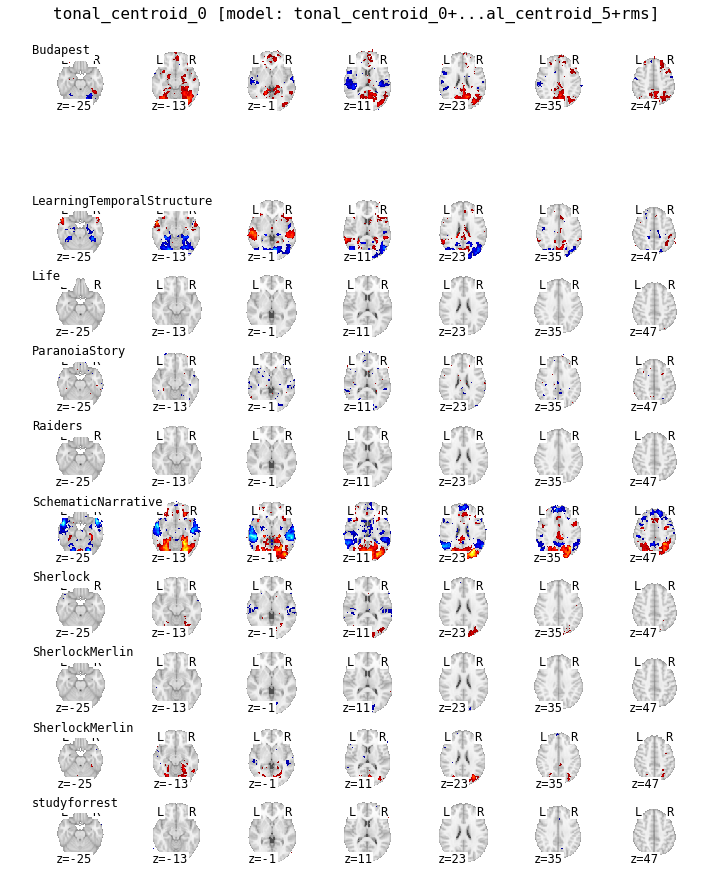

No image for HealthyBrainNetwork


/home/roberta/anaconda3/lib/python3.7/site-packages/nilearn/plotting/displays.py:780: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


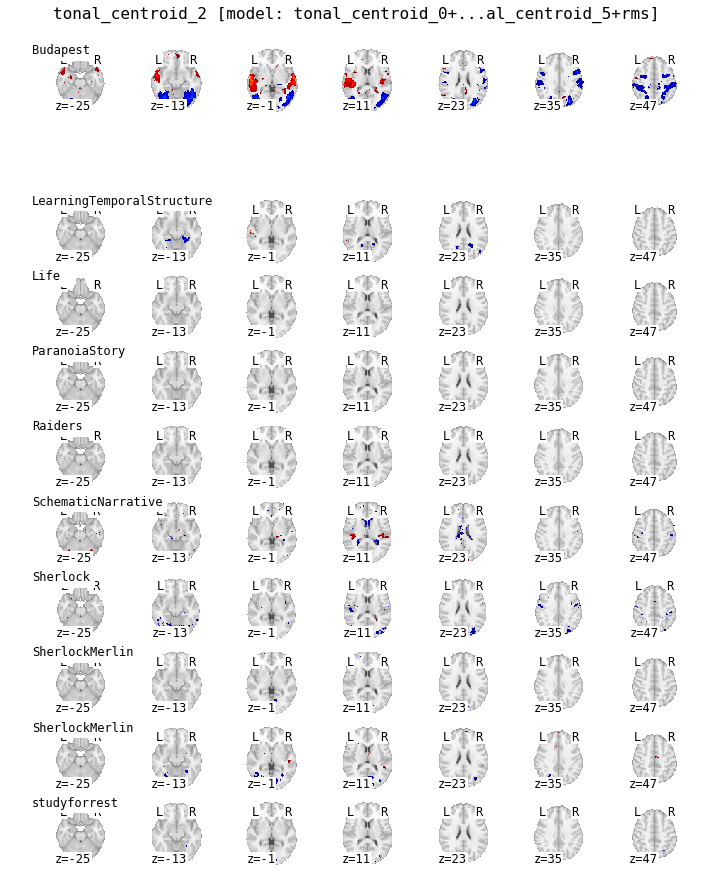

No image for HealthyBrainNetwork


/home/roberta/anaconda3/lib/python3.7/site-packages/nilearn/plotting/displays.py:780: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


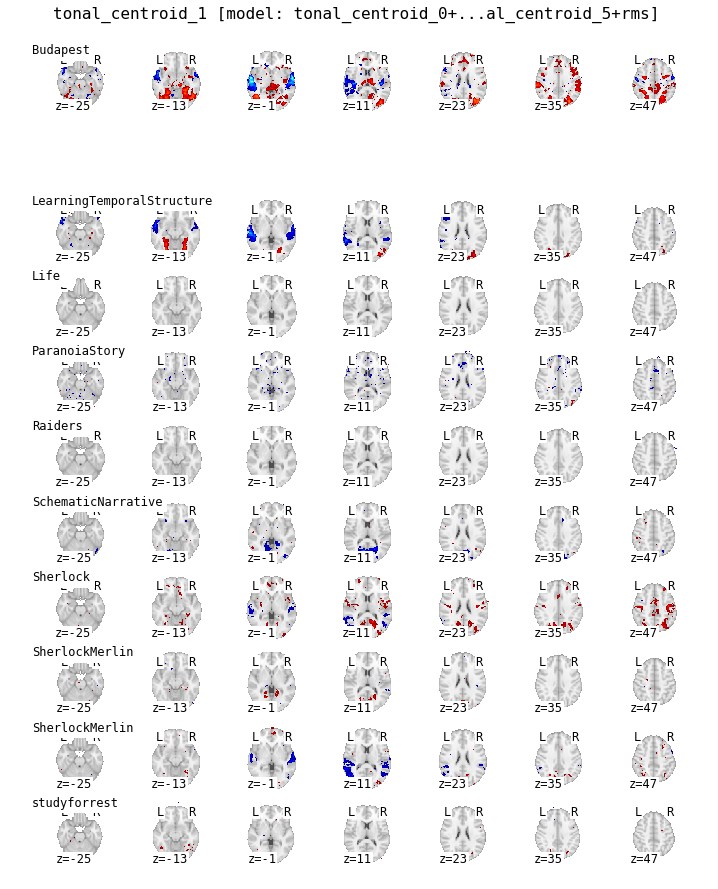

In [14]:
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_analysis(flat_models_tonal_rms,
                          vmax=10, display_mode='z', figsize=(12,15),
                          threshold=1.96, colorbar=False)

In [ ]:
plot_contrast_by_analysis(flat_models_cqt_rms,
                          vmax=10, display_mode='z', figsize=(12,15),
                          threshold=1.96, colorbar=False)

In [ ]:
plot_contrast_by_analysis(flat_models_spec,
                          vmax=10, display_mode='z', figsize=(12,15),
                          threshold=1.96, colorbar=False)